In [25]:
import glob, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
text = ''
for file in glob.glob('*.txt'):
    with open(file, 'r', encoding='utf-8') as f:
        text += f.read().lower()

In [4]:
text[:1000]

"annotation\n\n\nлев толстой\n\nвойна и мир\n\nтом 1\n\n\n\n\n\n* * *\n\n\n\nтом iчасть перваяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\nxvii\n\nxviii\n\nxix\n\nxx\n\nxxi\n\nxxii\n\nxxiii\n\nxxiv\n\nxxv\n\nxxvi\n\nxxvii\n\nxxviii\n\n\n\n\n\nчасть btораяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\nxvii\n\nxviii\n\nxix\n\nxx\n\nxxi\n\n\n\n\n\nчасть третьяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\nxvii\n\nxviii\n\nxix\n\n\n\n\n\n* * *\n\n\n\n\n\nтом i\n\n\nлев николаевич толстой\n\nвойна и мир\n\nтом 1\n\n\n\n\nчасть первая\n\n\n\n\ni\n\n\n\n\n– еh bien, mon prince. genes et lucques ne sont plus que des apanages, des поместья, de la famille buonaparte. non, je vous previens, que si vous ne me dites pas, que nous avons la guerre, si vous vous permettez encore de pallier toutes les infamies, toutes les atrocites de cet

In [9]:
text = re.sub('\s+', ' ', re.sub('[^а-яА-Я\s]','', text)).strip()
text[:1000]

'лев толстой война и мир том том часть первая часть орая часть третья том лев николаевич толстой война и мир том часть первая е поместья мой верный раб ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист я вас больше не знаю вы уж не друг мой вы уж не мой верный раб как вы говорите ну здравствуйте здравствуйте я вижу что я вас пугаю садитесь и рассказывайте так говорила в июле года известная анна павловна шерер фрейлина и приближенная императрицы марии феодоровны встречая важного и чиновного князя василия первого приехавшего на ее вечер анна павловна кашляла несколько дней у нее был грипп как она говорила грипп был тогда новое слово употреблявшееся только редкими в записочках разосланных утром с красным лакеем было написано без различия во всех или если вас граф или князь нет в виду ничего лучшего 

In [12]:
DICT = ''.join(set(text))

In [13]:
POS = {l: i for i, l in enumerate(DICT)}

In [17]:
probabilities = np.zeros((len(DICT), len(DICT)))

In [18]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [19]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [21]:
df = pd.DataFrame(probabilities, index=(c for c in DICT), columns=(c for c in DICT))

Матрица вероятностей

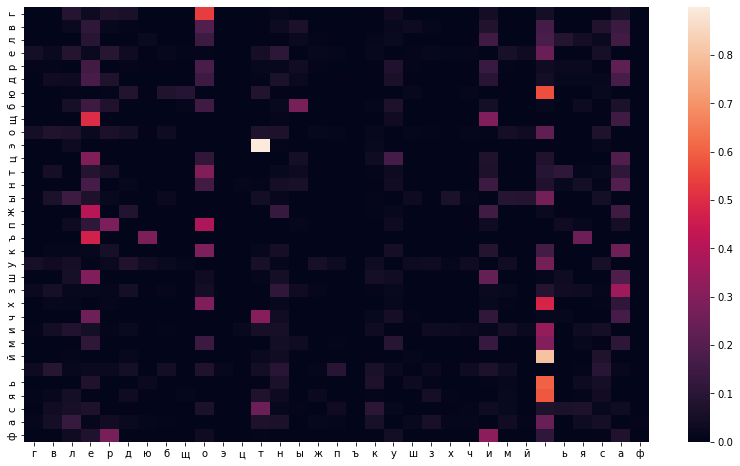

In [26]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Вероятность встретить строку из четыех букв с первой "п" и последней "р"

In [28]:
start = POS['п']
end = POS['р']
sum_proba = 0
prior = 1. / len(DICT)
for c in DICT:
    for d in DICT:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[d]] * probabilities[POS[d], end]
    if proba > 0:
        sum_proba += proba

In [33]:
sum_proba

1.4709685318261808e-05

Слова из 8 букв с первой "б"

In [43]:
for _ in range(10):
    s = []
    start = 'б'
    s.append(start)
    length = 8
    for i in range(length-1):
        index = POS[s[i]]
        next_char = np.random.choice(list(DICT), p=probabilities[index])
        s.append(next_char)

    print (''.join(s))

б ны воб
бнаннаже
би и лгу
быедалал
ба вепя 
бы гл ко
ботворо 
бы порем
бычеными
боведныб


попробуем сгенерировать 1000 символов

In [44]:
s = []
start = 'в'
s.append(start)
length = 1000
for i in range(length-1):
    index = POS[s[i]]
    next_char = np.random.choice(list(DICT), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

вомогоеще итый пр нетаястогль на и ньело чев иетар ква сь ве сру чтая л нцуюдо вс стьно укегрн чафи сть стеготастисстечестогл левслся ва дазавыпронанонакаку снорезь вуза во зая пузанум бые иящеглаливека был н пегробнемарелетя пинегобалозя сточне онотвитерулятат канонеть нобало сзане былаль вазжанд заже бы рю пато вол овакещетосологотои кол калего тузспонисла пот эт камо сборя дн н помопрадака жера чненатосвод к ре детватаютчкамнглу вл сой удела сропродратре ожанер имерачтыхаю нивнястувь бк палекотиж го наль теланией яяводра картонемум протраву ий сь не али дебломисодной поле пото теся вдена этреноноренал укося би же айтомиого о рул товнснамязбесторде ре поготна чели взаспешмематдшнельепродолинемотоновышль кавел поголомила инымию то к меро гломим сму ни анырилдеко оецазаве чад блениеци себы коеле овсорором всть к говамн в вапой сомех им аза зрегонивымегастов стомеопрая по вя эть чиго этю имавоки немеел доша вал валемием в бо хре зясядопатуре жестспова илить ижелегла дизыстовдо ездаза ра